In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('E:/HDD Documents/HDD Documents/School/WGU/d208_predictive_modeling/medical/medical_clean.csv')

In [3]:
df.drop(['Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8', 'City','State','County','Zip','Lat','Lng','Population','TimeZone','Additional_charges','TotalCharge','Services','Interaction',
'UID', 'Customer_id','Job','Income', 'Marital', 'CaseOrder', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Soft_drink','Initial_admin', 'Initial_days', 'Area','Children'],axis = 1, inplace = True)

In [4]:
df.isna().any()

Age                   False
Gender                False
ReAdmis               False
VitD_levels           False
HighBlood             False
Stroke                False
Complication_risk     False
Overweight            False
Arthritis             False
Diabetes              False
Hyperlipidemia        False
BackPain              False
Anxiety               False
Allergic_rhinitis     False
Reflux_esophagitis    False
Asthma                False
dtype: bool

In [5]:
df.describe()

,Age,VitD_levels
count,10000.000000,10000.000000
mean,53.511700,17.964262
std,20.638538,2.017231
min,18.000000,9.806483
25%,36.000000,16.626439
50%,53.000000,17.951122
75%,71.000000,19.347963
max,89.000000,26.394449


In [6]:
CategoricalData = df.select_dtypes(include = "object").columns
print(CategoricalData)

Index(['Gender', 'ReAdmis', 'HighBlood', 'Stroke', 'Complication_risk',
       'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma'],
      dtype='object')


In [7]:
NumericalData = df.select_dtypes(include = "number").columns
print (NumericalData)

Index(['Age', 'VitD_levels'], dtype='object')


No     6331
Yes    3669
Name: ReAdmis, dtype: int64


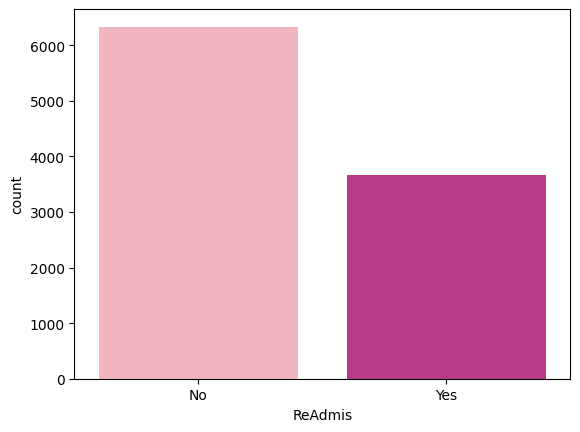

In [8]:
print(df['ReAdmis'].value_counts())
sns.countplot(x = 'ReAdmis', data = df, palette = 'RdPu')
plt.show()

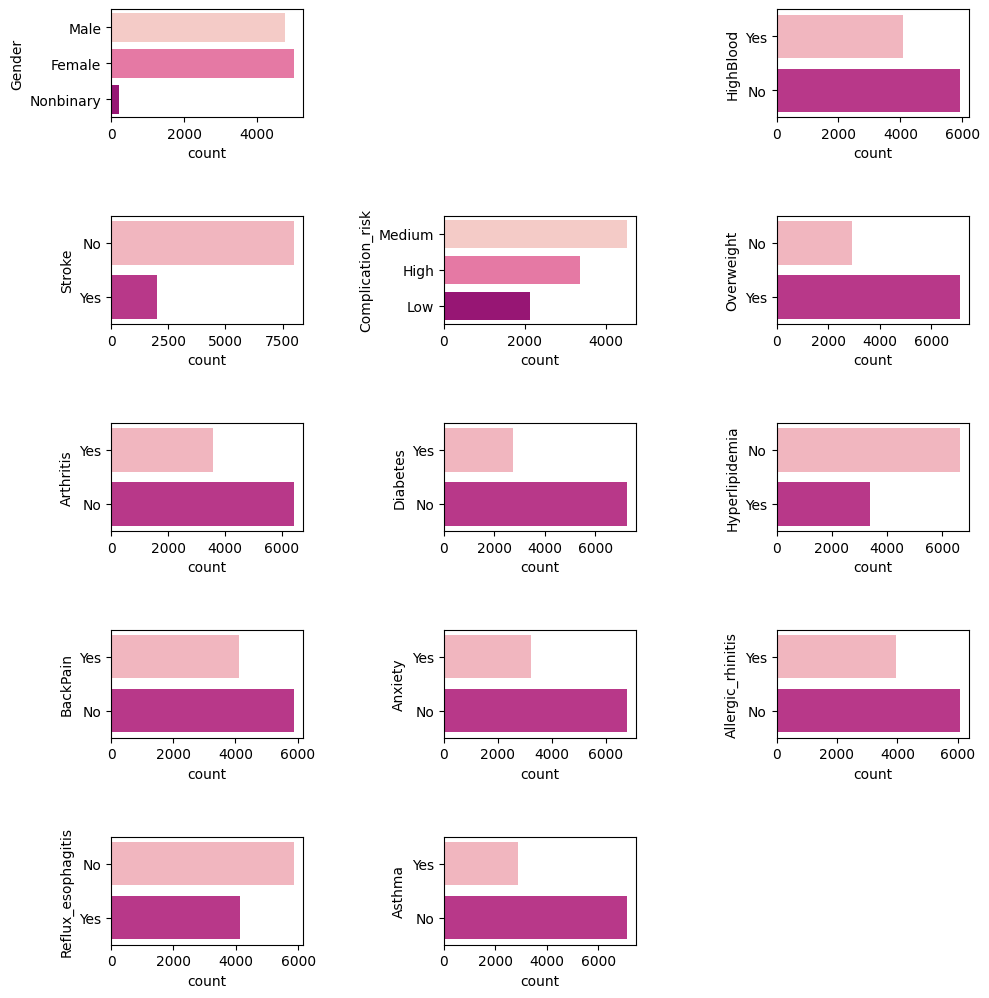

In [9]:
fig = plt.figure(figsize=(10, 20))
for i, col in enumerate(CategoricalData):
    if col != 'ReAdmis':
        plt.subplot(10, 3, i + 1)
        ax = sns.countplot(y = col, data = df, palette = 'RdPu')
        fig.tight_layout(h_pad = 4, w_pad = 4)
plt.show()

In [10]:
df['ReAdmis_plh'] = [1 if v == 'Yes' else 0 for v in df['ReAdmis']]
print(df['ReAdmis'])

0        No
1        No
2        No
3        No
4        No
       ... 
9995     No
9996    Yes
9997    Yes
9998    Yes
9999    Yes
Name: ReAdmis, Length: 10000, dtype: object


In [11]:
df = df[df.ReAdmis_plh != 0]
print(df['ReAdmis_plh'])

5000    1
5001    1
5005    1
5006    1
5008    1
       ..
9992    1
9996    1
9997    1
9998    1
9999    1
Name: ReAdmis_plh, Length: 3669, dtype: int64


<AxesSubplot: xlabel='ReAdmis_plh', ylabel='Age'>

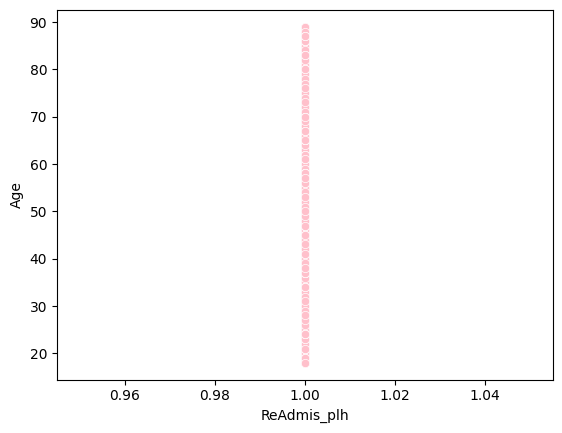

In [12]:
sns.scatterplot(x = df['ReAdmis_plh'], y = df['Age'], color ='pink')

<AxesSubplot: xlabel='ReAdmis_plh', ylabel='VitD_levels'>

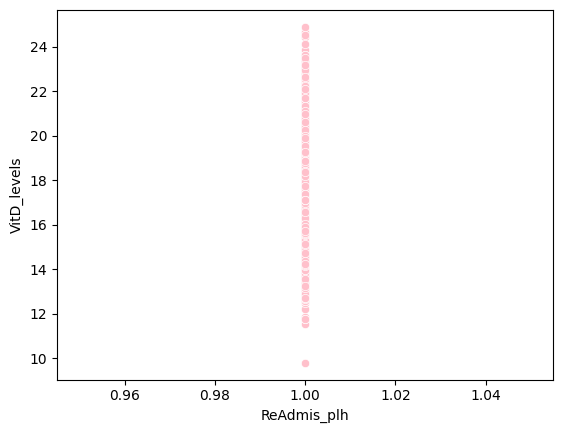

In [13]:
sns.scatterplot(x = df['ReAdmis_plh'], y = df['VitD_levels'], color ='pink')

In [14]:
df = df.replace(to_replace = ['Yes', 'No'], value = [1, 0])
df['Gender_plh'] = df['Gender'].replace(['Male', 'Female', 'Nonbinary'] , [1, 2, 3])
df['Comp_plh'] = df['Complication_risk'].replace(['Low', 'Medium', 'High'] , [1, 2, 3])


In [17]:
df['intercept'] = 1
log_model = sm.Logit(df['ReAdmis_plh'], df[['Age', 'VitD_levels', 'Gender_plh', 'HighBlood', 'Stroke', 'Comp_plh', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma','intercept']]).fit()
print(log_model.summary())


PerfectSeparationError: Perfect separation detected, results not available

In [ ]:
df['intercept'] = 1
log_model2 = sm.Logit(df['ReAdmis_plh'],df[['HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'intercept']]).fit()
print(log_model2.summary())

Optimization terminated successfully.
         Current function value: 0.656937
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            ReAdmis_plh   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Wed, 16 Nov 2022   Pseudo R-squ.:               0.0005290
Time:                        12:40:45   Log-Likelihood:                -6569.4
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                    0.8028
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
HighBlood              0.0108      0.042      0.255      0.799      -0.072       0.094
Strok

In [ ]:
df.drop(['Age','Complication_risk', 'Gender', 'ReAdmis', 'VitD_levels', 'Gender_plh', 'Comp_plh'], axis = 1, inplace = True)

In [ ]:
df.to_csv('E:/HDD Documents/HDD Documents/School/WGU/d208_predictive_modeling/medical_cleaned208_task2_v2.csv', index = False)

In [ ]:
matrix_df = pd.read_csv('E:/HDD Documents/HDD Documents/School/WGU/d208_predictive_modeling/medical_cleaned208_task2_v2.csv')

In [ ]:
matrix_df = df[['HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'intercept', 'ReAdmis_plh']]

X = matrix_df.iloc[:, 1:-1].values
y = matrix_df.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[1262    0]
 [ 738    0]]


<AxesSubplot: >

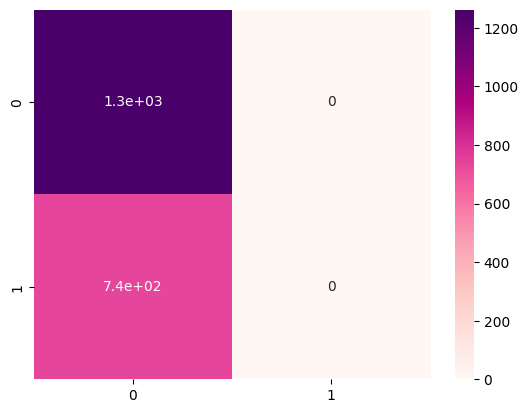

In [ ]:
y_predict = classifier.predict(X_test)
y_matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(y_matrix, annot = True, cmap = 'RdPu')

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77      1262
           1       0.00      0.00      0.00       738

    accuracy                           0.63      2000
   macro avg       0.32      0.50      0.39      2000
weighted avg       0.40      0.63      0.49      2000



c:\Users\nsgoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nsgoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nsgoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,